# Q-1
1) Delivery_time -> Predict delivery time using sorting time 


------------------------------------------------------------
Build a simple linear regression model by performing EDA and do necessary transformations and select 

the best model using R or Python.

In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
df=pd.read_csv('delivery_time.csv')
df.head(4)                                 # uploaded the data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9


In [23]:
df.shape  # 2- columns , 21- rows

(21, 2)

In [24]:
df.info()   # its mean no null value in this data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [25]:
df.rename(columns={"Delivery Time": "Delivery_Time","Sorting Time":"Sorting_Time"}, inplace=True)
df.head()                 # Here we have renamed the columns name 

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


c:\users\babar ali\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

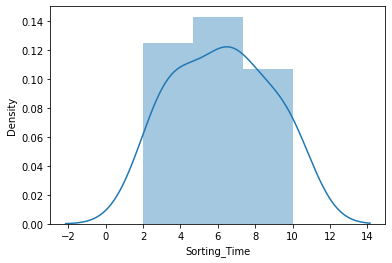

In [26]:
import seaborn as sns 
sns.distplot(df.Sorting_Time)  # this graph is showing data distribution is  normal distribution 


(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

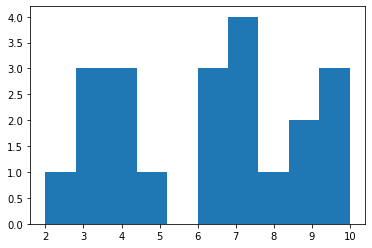

In [27]:
plt.hist(df.Sorting_Time)

In [28]:
df.duplicated()    # its mean no duplicat value 

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

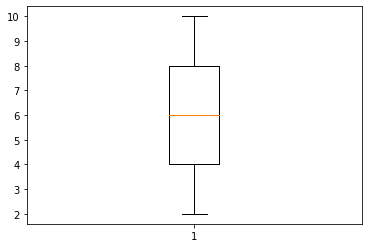

In [29]:
import matplotlib.pyplot as plt

box1= df['Sorting_Time']                        # no outlier in data 
box2=plt.boxplot(box1)

In [30]:
for i in box2['fliers']:  # no outlier 
    print(i.get_ydata()) 

[]


In [31]:
df[df.duplicated()]             # no duplicate 

,Delivery_Time,Sorting_Time


In [32]:
df.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


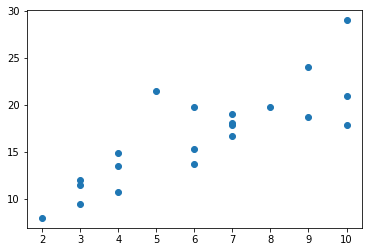

In [33]:
from matplotlib import pyplot as plt
x=df['Sorting_Time']
y=df['Delivery_Time']
plt.scatter(x,y)  # scatter plot is showing this is almost linear relation b/w sorting and delvery time

In [34]:
import statsmodels.formula.api as smf
model=smf.ols('y~x', data=df).fit()          # here we have used oridinary least square method 

In [35]:
model.params

Intercept    6.582734
x            1.649020
dtype: float64

In [36]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 30 May 2023   Prob (F-statistic):           3.98e-06
Time:                        13:38:41   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
x              1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
model.rsquared                 

0.6822714748417231

In [37]:
# Transforming variables for good accuracy

model2 = smf.ols('y~np.log(x)',data=df).fit()


In [38]:
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 30 May 2023   Prob (F-statistic):           2.64e-06
Time:                        13:46:03   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(x)      9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
model2.rsquared                   

0.6954434611324223

In [41]:
# Exponential transformation

model3 = smf.ols('np.log(y)~x',data=df).fit()



In [42]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(y)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Tue, 30 May 2023   Prob (F-statistic):           1.59e-06
Time:                        13:49:19   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
x              0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
model3.rsquared                   

0.7109478980584187

In [44]:
model4 = smf.ols('np.log(y)~np.log(x)',data=df).fit()


In [45]:
model4.rsquared           # this is best model 

0.77216134926874

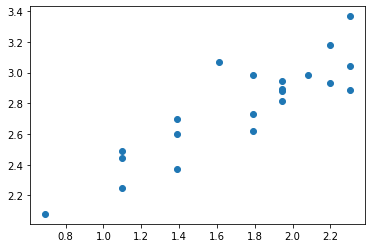

In [50]:
plt.scatter(np.log(x),np.log(y))

*********************************

# Q-2
2) Salary_hike -> Build a prediction model for Salary_hike

------------------------------------------------------------
Build a simple linear regression model by performing EDA and do necessary transformations and select 

the best model using R or Python.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

df2= pd.read_csv('Salary_Data.csv')   # uploaded another data for 2nd question 

In [2]:
df2.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df2.info()   # no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


c:\users\babar ali\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

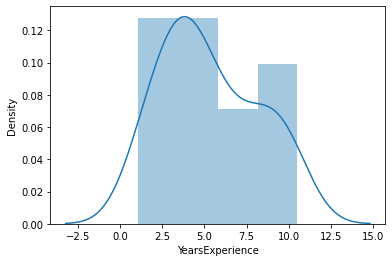

In [4]:
import seaborn as sns 
sns.distplot(df2.YearsExperience)  


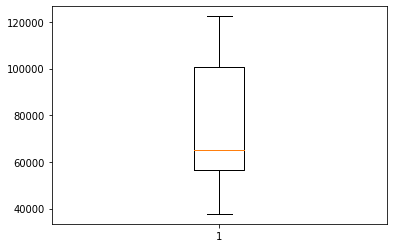

In [5]:
plt.boxplot(df2['Salary'])
plt.show()                       # no outlier 

In [6]:
df2[df2.duplicated()]              # no duplicate value

,YearsExperience,Salary


In [7]:
array=df2.values               # converted data in array

In [8]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler().fit(array)                                      # this calulate mean and standard devitaiion  
df3=scaler.transform(array)                                             # this transform all values 

#set_printoptions(precision=2)         
                                          # here we have done standardization both columns 
                                          # because  experience and salary have more different in digit form so we have make
                                          # meaning ful data accoding model

In [9]:
df3

array([[-1.51005294, -1.36011263],
       [-1.43837321, -1.10552744],
       [-1.36669348, -1.419919  ],
       [-1.18749416, -1.20495739],
       [-1.11581443, -1.33978143],
       [-0.86493538, -0.71830716],
       [-0.82909552, -0.58815781],
       [-0.75741579, -0.79981746],
       [-0.75741579, -0.42881019],
       [-0.57821647, -0.69801306],
       [-0.50653674, -0.47433279],
       [-0.47069688, -0.74976858],
       [-0.47069688, -0.70662043],
       [-0.43485702, -0.70201994],
       [-0.29149756, -0.55250402],
       [-0.1481381 , -0.29921736],
       [-0.07645838, -0.37004264],
       [-0.00477865,  0.26285865],
       [ 0.21026054,  0.19885989],
       [ 0.2461004 ,  0.66547573],
       [ 0.53281931,  0.58377993],
       [ 0.6403389 ,  0.82623317],
       [ 0.92705781,  0.93861127],
       [ 1.03457741,  1.40274136],
       [ 1.21377673,  1.24020308],
       [ 1.32129632,  1.09740238],
       [ 1.50049564,  1.51986835],
       [ 1.5363355 ,  1.3590738 ],
       [ 1.78721455,

In [10]:
df4=pd.DataFrame({'YearsExperience':df3[0:30,0], 'Salary':df3[:,1]})
df4.head()

,YearsExperience,Salary
0,-1.510053,-1.360113
1,-1.438373,-1.105527
2,-1.366693,-1.419919
3,-1.187494,-1.204957
4,-1.115814,-1.339781


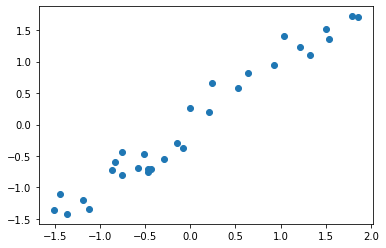

In [11]:
plt.scatter(df4.YearsExperience,df4.Salary)      # this graph is showing this is good linear relation b/w inpendent and depdent data 

In [12]:
import statsmodels.formula.api as smf
x1=df4.YearsExperience
y1=df4.Salary
model11=smf.ols('y1~x1', data = df4).fit()

In [13]:
model11.rsquared                 # this is best accuracy 

0.9569566641435086

In [ ]:
# Transforming variables for good accuracy


In [14]:
model12=smf.ols('np.sqrt(y1)~x1', data = df4).fit()

c:\users\babar ali\appdata\local\programs\python\python37\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [59]:
model12.summary()

c:\users\babar ali\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.sqrt(y1)   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     77.60
Date:                Wed, 31 May 2023   Prob (F-statistic):           2.58e-06
Time:                        11:10:19   Log-Likelihood:                 12.049
No. Observations:                  13   AIC:                            -20.10
Df Residuals:                      11   BIC:                            -18.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5615      0.056     10.051      0.000       0.439       0.684
x1             0.4277      0.049      8.809      0.000       0.321       0.535
==============================================================================
Omnibus:                        0.783   Durbin-Watson:                   2.345
Prob(Omnibus):                  0.676   Jarque-Bera (JB):                0.009
Skew:                           0.003   Prob(JB):                        0.995
Kurtosis:                       3.132   Cond. No.                         3.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model12.rsquared

0.8758432684119467

In [36]:
model13=smf.ols('(y1)~np.sqrt(x1)', data = df4).fit()

In [37]:
model13.rsquared

0.8829243582817372

In [38]:
model14=smf.ols('(y1)~np.log(x1)', data = df4).fit()

In [39]:
model14.rsquared

0.8448872123054443

In [57]:
model15=smf.ols('pow(y1,3)~(x1)', data = df4).fit()    

In [58]:
model15.rsquared

0.8447419750034821